In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from IPython.display import Audio
import librosa as lib
import modelisation_physique.guide_onde as go
import modelisation_physique.Modele_modal_fct_rampe as mo
import modelisation_physique.modal_solveur_python as md
import soundfile as sf

In [2]:
#### Pour la clarinette

gamma = 0.8
zeta = 0.4

gammas = [0.2, 0.3, 0.4,0.6,0.9]
zetas = [0.2, 0.3, 0.6, 0.9]

t_max = 2 
sample_rate = 44100

l = 60e-2
rate_gauss = 0.08

c0 = 340

def audio_image_clarinette(t_max, sample_rate,gamma,zeta):
    Nsim = int(t_max*sample_rate)
    tps = np.linspace(0,Nsim/sample_rate, Nsim)
    p,_ = go.clarinette(t_max=t_max,sample_rate=sample_rate,gamma=gamma, zeta=zeta,type_reflection='gauss',l=l,c0=c0,rate_gauss=rate_gauss)
    
    fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True, sharey=True,figsize=(15,6),dpi=200)
    ax[0].plot(tps,p,color='indianred')
    ax[0].set_xlim(0,0.5)
    ax[0].set_ylabel(r"$p$",size=14)
    ax[0].set_title(r"Guide d'onde",size=14)
    
    p2,_ = mo.simulation(tmax=t_max,nb_mode=2,instrument='clarinette',sample_rate=sample_rate, gamma_velo=gamma,zeta_force=zeta,durete_rampe=1,l_resonateur=l)

    ax[1].plot(tps,p2,color='darkred')
    ax[1].set_xlim(0,0.5)
    ax[1].set_ylabel(r"$p$",size=14)
    ax[1].set_xlabel(r"Temps en s",size=14)
    ax[1].set_title(r"Méthode modale",size=14)
    
    fig.tight_layout()
    
    fig.savefig("audio/gamma"+str(int(gamma*10))+"_zeta"+str(int(zeta*10))+"_l"+str(int(l*1e2))+".png", transparent=True,bbox_inches = "tight")
    
    sf.write("audio/GOgamma"+str(int(gamma*10))+"_zeta"+str(int(zeta*10))+"_l"+str(int(l*1e2))+".wav",p,sample_rate)
    sf.write("audio/MOgamma"+str(int(gamma*10))+"_zeta"+str(int(zeta*10))+"_l"+str(int(l*1e2))+".wav",p2,sample_rate)
    
    return "done !"

In [8]:
#audio_image_clarinette(t_max=t_max,sample_rate=sample_rate,gamma=0.6,zeta=0.6)

'done !'

In [2]:
def audio_image_violon(t_max, sample_rate,l,gamma,zeta,beta,nb_modes):
    Nsim = int(t_max*sample_rate)
    tps = np.linspace(0,Nsim/sample_rate, Nsim)
    v,_,_ = md.cordes(t_max=t_max,sample_rate=sample_rate,gamma=gamma, zeta=zeta,beta=beta,l=l,nb_modes=nb_modes)
    
    #fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True, sharey=True,figsize=(15,6),dpi=200)
    #ax[0].plot(tps,p,color='indianred')
    #ax[0].set_xlim(0,0.5)
    #ax[0].set_ylabel(r"$p$",size=14)
    #ax[0].set_title(r"Guide d'onde",size=14)
    
    #v2,_ = mo.simulation(tmax=t_max,nb_mode=2,instrument='violon',sample_rate=sample_rate, gamma_velo=gamma,zeta_force=zeta,durete_rampe=1,l_resonateur=l)

    #ax[1].plot(tps,p2,color='darkred')
    #ax[1].set_xlim(0,0.5)
    #ax[1].set_ylabel(r"$p$",size=14)
    #ax[1].set_xlabel(r"Temps en s",size=14)
    #ax[1].set_title(r"Méthode modale",size=14)
    
    plt.figure(figsize=(15,3))
    plt.plot(tps,v,color='olivedrab')
    #plt.ylim(-0.4,0.55)
    plt.title(r"Modèle modal",size=14)
    plt.xlabel(r"Temps en s",size=14)
    plt.ylabel(r"$v$",size=14)
    plt.xlim(0,0.5)
    
    plt.tight_layout()
    
    plt.savefig("audio/cordes_MOgamma"+str(int(gamma*10))+"_zeta"+str(int(zeta*10))+"_l"+str(int(l*1e2))+".png", transparent=True,bbox_inches = "tight")
    
    display(Audio(v,rate=sample_rate))
    #sf.write("audio/cordes_GOgamma"+str(int(gamma*10))+"_zeta"+str(int(zeta*10))+"_l"+str(int(l*1e2))+".wav",v,sample_rate)
    sf.write("audio/cordes_MOgamma"+str(int(gamma*10))+"_zeta"+str(int(zeta*10))+"_l"+str(int(l*1e2))+".wav",v,sample_rate)
    
    return "done !"

155.7632398753894
[  195.84158416   391.66516652   587.48874887   783.31233123
   981.13411341  1176.95769577  1372.78127813  1568.60486049
  1764.42844284  2156.07560756  2351.89918992  2547.72277228
  2745.54455446  2941.36813681  3137.19171917  3333.01530153
  3528.83888389  3724.66246625  4116.30963096  4312.13321332
  4509.9549955   4705.77857786  4901.60216022  5097.42574257
  5293.24932493  5489.07290729  5684.89648965  6076.54365437
  6274.36543654  6470.1890189   6666.01260126  6861.83618362
  7057.65976598  7253.48334833  7449.30693069  7645.13051305
  8038.77587759  8234.59945995  8430.4230423   8626.24662466
  8822.07020702  9017.89378938  9213.71737174  9409.5409541
  9605.36453645  9999.00990099 10194.83348335 10390.65706571
 10586.48064806 10782.30423042 10978.12781278 11173.95139514
 11369.7749775  11567.59675968 11959.24392439 12155.06750675
 12350.89108911 12546.71467147 12742.53825383 12938.36183618
 13134.18541854 13332.00720072 13527.83078308 13919.47794779
 14115.

'done !'

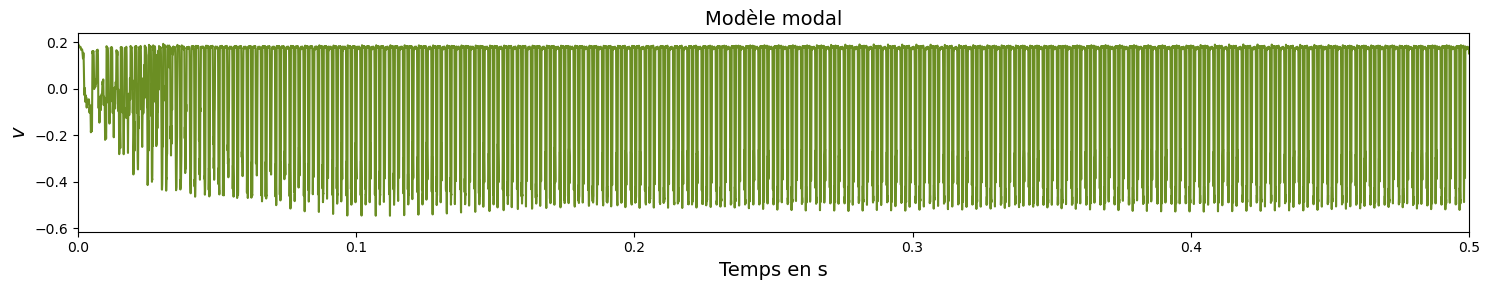

In [9]:
t_max = 2 
sample_rate = 22500

beta = 0.3
l = 33e-2

vb = 0.2
Fb = 5

audio_image_violon(t_max=t_max, sample_rate=sample_rate,l=l,gamma=vb,zeta=Fb,beta=beta,nb_modes=25)